# Customer Lifecycle Analytics  
## Customer Lifetime Value (CLV) & Retention Prioritization

### Objective
The objective of this notebook is to estimate customer lifetime value (CLV)
and combine it with churn risk to identify high-impact retention opportunities.

### Why CLV Matters
Not all customers contribute equally to business value. CLV helps quantify
the long-term value of customers and ensures retention efforts are focused
on customers who matter most to revenue.

### Key Questions
- What is the distribution of customer lifetime value?
- How does CLV differ between churned and retained customers?
- Which customers are both high value and high churn risk?
- How can churn risk and CLV be combined to guide retention strategy?

### Dataset Used


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/processed/customer_churn_scored.csv")
df.head()


,creditscore,geography,gender,age,tenure,balance,numofproducts,has_credit_card,is_active_member,estimatedsalary,...,age_group,tenure_group,high_balance_flag,engagement_score,low_satisfaction_flag,single_product_flag,salary_segment,risk_score,churn_probability,risk_segment
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,Mid-Age,New,0,2,1,1,Medium,2,0.243252,Low Risk
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,Mid-Age,New,0,1,0,1,Medium,1,0.993386,High Risk
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,Mid-Age,Established,1,1,0,0,Medium,1,0.997899,High Risk
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,Mid-Age,New,0,1,0,0,Medium,1,0.408105,Medium Risk
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,Mid-Age,New,1,3,0,1,Medium,1,0.000129,Low Risk


In [3]:
df.shape, df.isnull().sum()


((10000, 25),
 creditscore                0
 geography                  0
 gender                     0
 age                        0
 tenure                     0
 balance                    0
 numofproducts              0
 has_credit_card            0
 is_active_member           0
 estimatedsalary            0
 churn                      0
 complain                   0
 satisfaction_score         0
 card_type                  0
 point_earned               0
 age_group                  0
 tenure_group             413
 high_balance_flag          0
 engagement_score           0
 low_satisfaction_flag      0
 single_product_flag        0
 salary_segment             0
 risk_score                 0
 churn_probability          0
 risk_segment               0
 dtype: int64)

In [4]:
df["clv"] = df["balance"] + (df["estimatedsalary"] * 0.1)


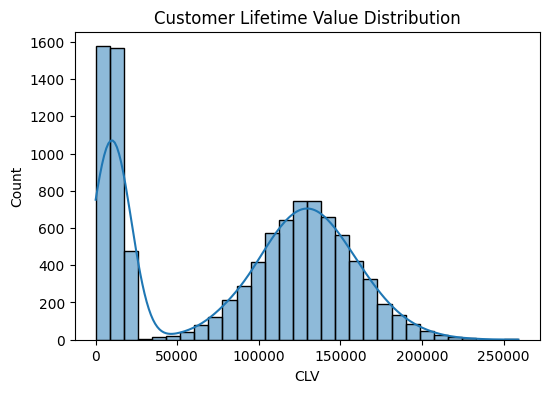

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df["clv"], bins=30, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.show()


In [6]:
df.groupby("churn")["clv"].mean()


churn
0     82715.435977
1    101260.466884
Name: clv, dtype: float64

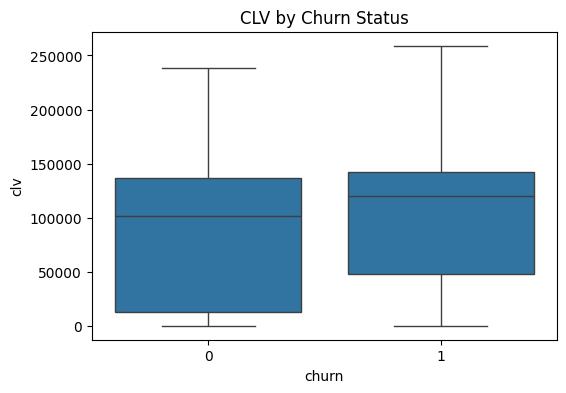

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x="churn", y="clv", data=df)
plt.title("CLV by Churn Status")
plt.show()


In [8]:
df.groupby("risk_segment")["clv"].mean()


risk_segment
High Risk      101893.013221
Low Risk        82366.284840
Medium Risk    102364.610306
Name: clv, dtype: float64

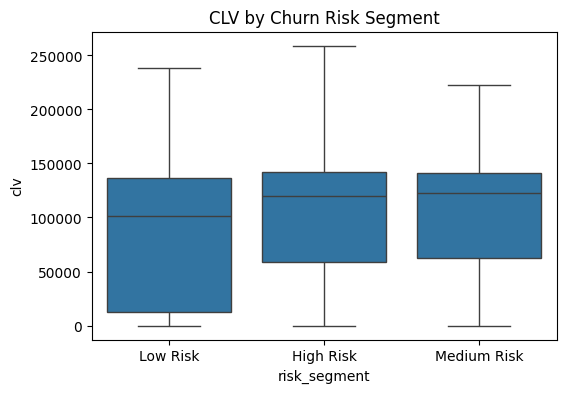

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="risk_segment", y="clv", data=df)
plt.title("CLV by Churn Risk Segment")
plt.show()


In [10]:
clv_threshold = df["clv"].quantile(0.75)
clv_threshold


np.float64(137799.62425)

In [11]:
df["retention_priority"] = "Low Priority"

df.loc[
    (df["risk_segment"] == "High Risk") & (df["clv"] >= clv_threshold),
    "retention_priority"
] = "Critical Priority"

df.loc[
    (df["risk_segment"] == "Medium Risk") & (df["clv"] >= clv_threshold),
    "retention_priority"
] = "High Priority"

df["retention_priority"].value_counts()


retention_priority
Low Priority         9397
Critical Priority     550
High Priority          53
Name: count, dtype: int64

In [12]:
pd.crosstab(
    df["retention_priority"],
    df["churn"],
    normalize="index"
) * 100


churn,0,1
retention_priority,,
Critical Priority,2.545455,97.454545
High Priority,67.924528,32.075472
Low Priority,84.197084,15.802916


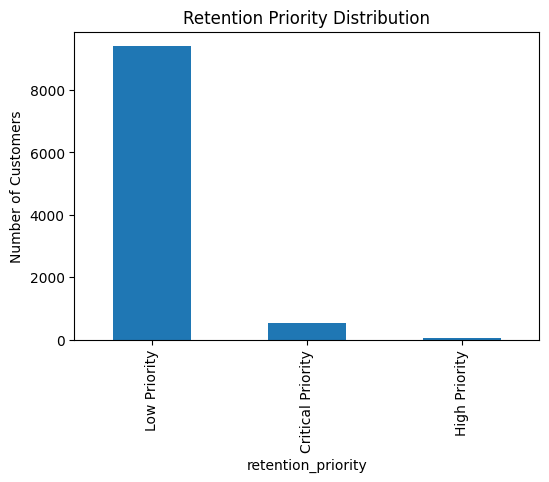

In [13]:
plt.figure(figsize=(6,4))
df["retention_priority"].value_counts().plot(kind="bar")
plt.title("Retention Priority Distribution")
plt.ylabel("Number of Customers")
plt.show()


In [14]:
df.to_csv(
    "../data/processed/customer_lifecycle_final.csv",
    index=False
)

print("✅ Final customer lifecycle dataset saved successfully!")


✅ Final customer lifecycle dataset saved successfully!


## Key CLV & Retention Insights

- A small segment of customers contributes disproportionately to total lifetime value.
- High churn risk combined with high CLV represents the greatest revenue threat.
- Many low-risk customers have moderate CLV and require minimal intervention.
- Prioritizing retention based on both churn risk and value enables efficient
  allocation of retention resources.

## Business Recommendations

- Immediately target high-risk, high-CLV customers with personalized retention offers.
- Use proactive engagement strategies for medium-risk, high-value customers.
- Avoid overspending retention resources on low-value, low-risk customers.
- Integrate churn probability and CLV into ongoing customer monitoring systems.
